In [1]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

In [2]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

94781440/94765736 [==============================] - 16s 0us/step


In [3]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [5]:
## D:\fashion dataset\fashion-dataset\images

In [6]:
img = image.load_img(r'D:\fashion dataset\fashion-dataset\images\1163.jpg',target_size=(224,224))

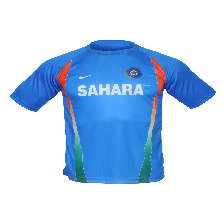

In [7]:
img

In [8]:
img_array = image.img_to_array(img)

In [9]:
img_array

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [12]:
with np.printoptions(threshold=np.inf):
    print(img_array)

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255.

In [16]:
img_array.shape

(224, 224, 3)

In [17]:
expanded_img_array = np.expand_dims(img_array, axis=0)

In [19]:
expanded_img_array.shape

(1, 224, 224, 3)

In [20]:
with np.printoptions(threshold=np.inf):
    print(expanded_img_array)

[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]


In [21]:
preprocessed_img = preprocess_input(expanded_img_array)

In [22]:
preprocessed_img

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [23]:
result_nf = model.predict(preprocessed_img)

In [25]:
result_nf.shape

(1, 2048)

In [26]:
result = model.predict(preprocessed_img).flatten()

In [28]:
result.shape

(2048,)

In [30]:
result

array([ 5.004223, 32.426292,  4.072415, ...,  0.      , 10.771166,
        8.938474], dtype=float32)

In [29]:
normalized_result = result / norm(result)

In [31]:
normalized_result

array([0.01674359, 0.10849487, 0.01362586, ..., 0.        , 0.03603916,
       0.02990717], dtype=float32)

In [32]:
norm(result)

298.87396

In [33]:
normalized_result.shape

(2048,)

In [34]:
normalized_result.shape

(2048,)

In [35]:
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [36]:
filenames = []

for file in os.listdir(r'D:\fashion dataset\fashion-dataset\images'):
    filenames.append(os.path.join(r'D:\fashion dataset\fashion-dataset\images',file))

In [41]:
len(filenames)

44441

In [42]:
feature_list = []

for file in tqdm(filenames):
    feature_list.append(extract_features(file,model))

100%|██████████| 44441/44441 [2:21:44<00:00,  5.23it/s]  


In [43]:
pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))